In [295]:
import pandas as pd
import sqlite3
import openpyxl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
import matplotlib.cm as cm



In [296]:
df = pd.read_csv("../Sample-Superstore.csv", sep = ",", encoding='windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [297]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [298]:
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('-','')

In [299]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [300]:
df_monetary = df.groupby('CustomerID')['Sales'].sum()
df_monetary = df_monetary.reset_index()

In [301]:
df_monetary.head()

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [302]:
df_freuquency = df.groupby('CustomerID')["OrderID"].count()
df_freuquency = df_freuquency.reset_index()
df_freuquency

,CustomerID,OrderID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [303]:
df_Recency = df.groupby("CustomerID")["OrderDate"].max()
df_Recency = df_Recency.reset_index()
df_Recency

,CustomerID,OrderDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10
...,...,...
788,XP-21865,2017-11-17
789,YC-21895,2017-12-26
790,YS-21880,2017-12-21
791,ZC-21910,2017-11-06


In [304]:
df1 = pd.merge(pd.merge(df_monetary, df_freuquency, on = "CustomerID"), df_Recency, on = "CustomerID")
df1

,CustomerID,Sales,OrderID,OrderDate
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21
791,ZC-21910,8025.707,31,2017-11-06


In [305]:
df1.rename(columns = {'Sales':'Amount', 'OrderID':'Frequency', 'OrderDate':'Recency'}, inplace = True)
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21
791,ZC-21910,8025.707,31,2017-11-06


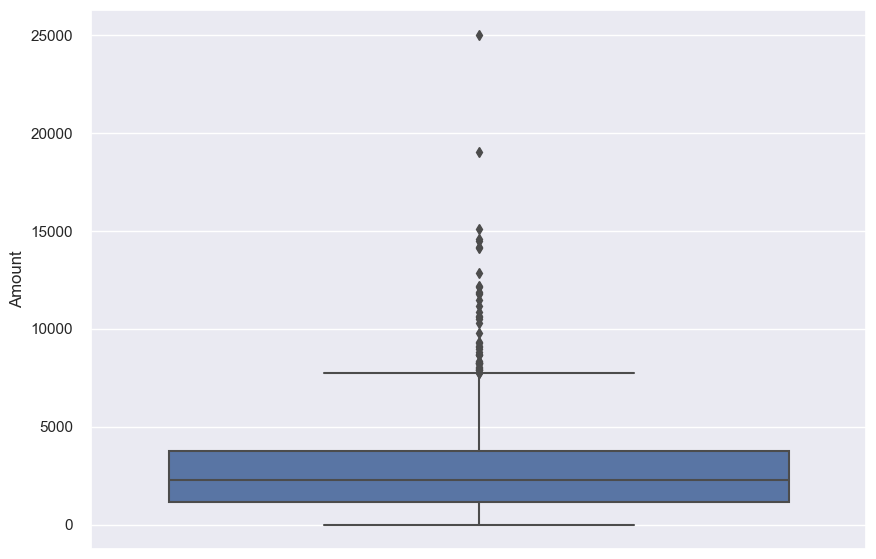

In [306]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

In [307]:
df1.head()

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10


remove outliers

In [309]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [311]:
df1 = remove_outlier(df1, "Amount")

In [312]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
787,WB-21850,6160.102,37,2017-12-10
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21


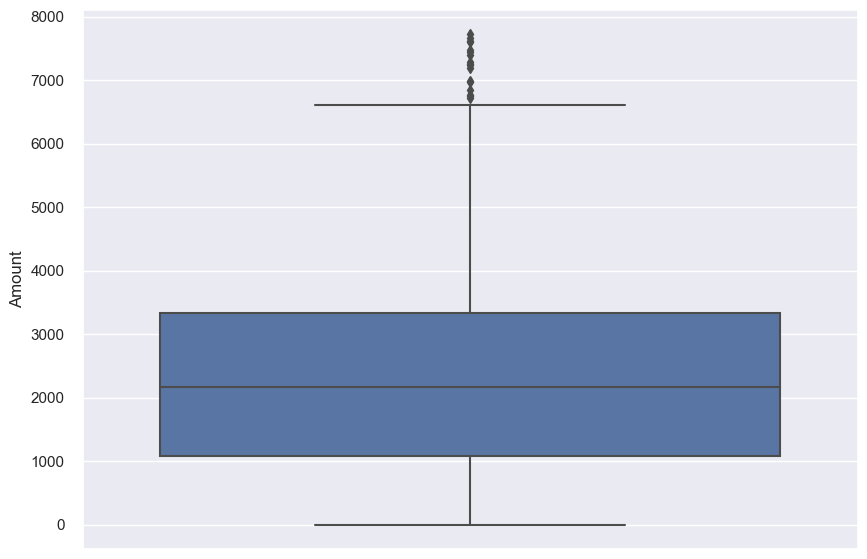

In [313]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

In [314]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
787,WB-21850,6160.102,37,2017-12-10
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21


In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 792
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  750 non-null    object        
 1   Amount      750 non-null    float64       
 2   Frequency   750 non-null    int64         
 3   Recency     750 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 29.3+ KB


In [315]:
now = datetime.datetime.today()
now


datetime.datetime(2023, 3, 10, 16, 50, 34, 367999)

In [258]:
day2018 = datetime.datetime.

SyntaxError: invalid syntax (49329291.py, line 1)

In [316]:
a = now - df1["Recency"][0]
a.days


2080

In [317]:
df1["Recency"] = (now - df1["Recency"]).dt.days
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_5572\4059013530.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2080
1,AA-10375,1056.390,15,1915
2,AA-10480,1790.512,12,2155
3,AA-10645,5086.935,18,1951
4,AB-10015,886.156,6,2311
...,...,...,...,...
787,WB-21850,6160.102,37,1916
788,XP-21865,2374.658,28,1939
789,YC-21895,5454.350,8,1900
790,YS-21880,6720.444,12,1905


In [318]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 792
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  750 non-null    object 
 1   Amount      750 non-null    float64
 2   Frequency   750 non-null    int64  
 3   Recency     750 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 45.5+ KB


In [320]:
df1 = remove_outlier(df1, "Frequency")

In [321]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2080
1,AA-10375,1056.390,15,1915
2,AA-10480,1790.512,12,2155
3,AA-10645,5086.935,18,1951
4,AB-10015,886.156,6,2311
...,...,...,...,...
785,VT-21700,1736.596,9,2896
786,VW-21775,6134.038,18,1924
789,YC-21895,5454.350,8,1900
790,YS-21880,6720.444,12,1905


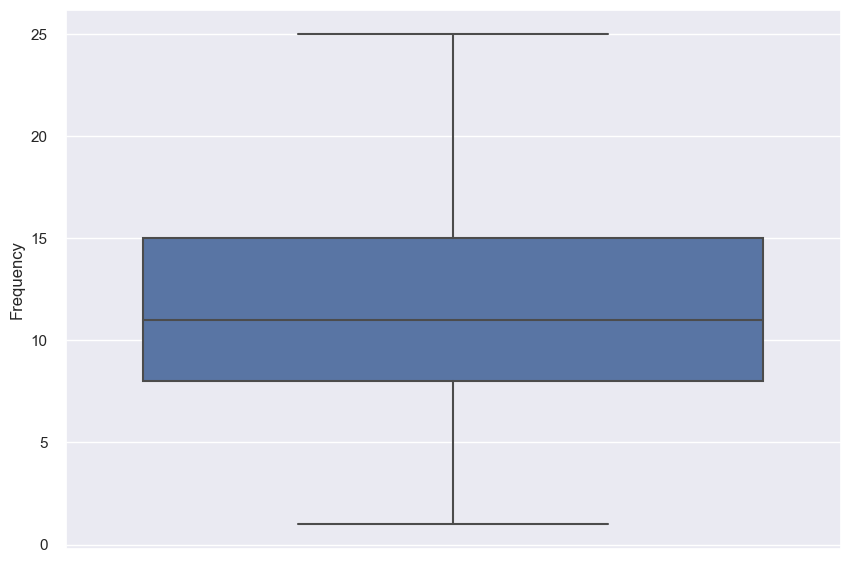

In [322]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Frequency")
plt.show()

In [324]:
# Rescaling the attributes
df2 = df1[["Amount", "Frequency", "Recency"]]

# Instantiate
scaler = StandardScaler()

# fit_transform
df2_scaled = scaler.fit_transform(df2)
df2_scaled.shape

df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = ['Amount', 'Frequency', 'Recency']
df2_scaled

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402
...,...,...,...
725,-0.387960,-0.518404,4.515073
726,2.234742,1.177769,-0.643457
727,1.829366,-0.706868,-0.770828
728,2.584484,0.046987,-0.744292


## Finding the optimal number of clusters: the Elbow method and the Silhouette analysis
### the Elbow Method

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\sat

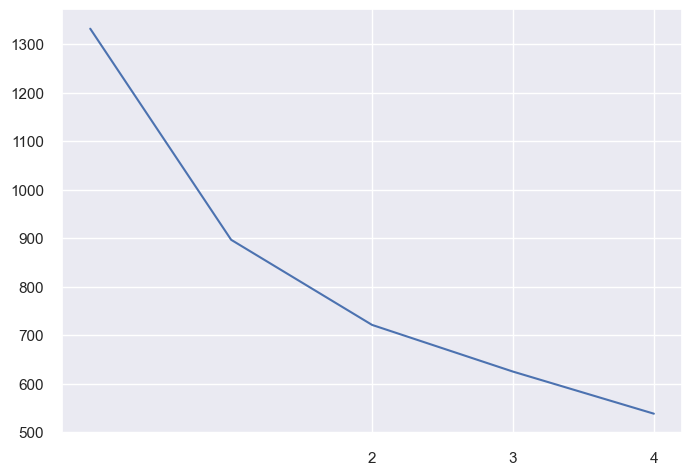

In [326]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.xticks([2,3,4,5,6])
plt.plot(ssd)

# Silhouetten Analysis

In [327]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



For n_clusters=2, the silhouette score is 0.3571772672916187


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



For n_clusters=3, the silhouette score is 0.3796773789987821


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



For n_clusters=4, the silhouette score is 0.33088072079634356


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



For n_clusters=5, the silhouette score is 0.3422912764088706


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



For n_clusters=6, the silhouette score is 0.33673970476268905


visualize silhouetten analysis

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\sat

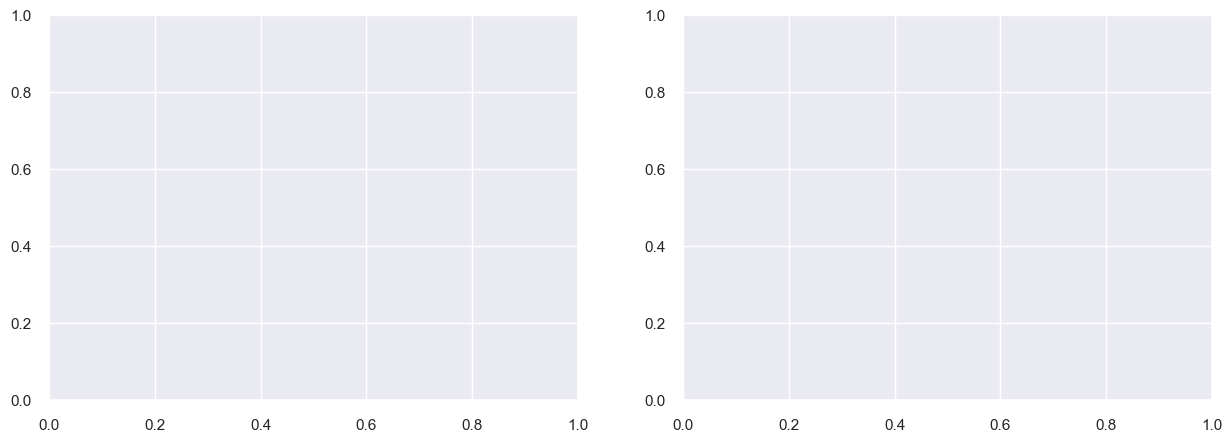

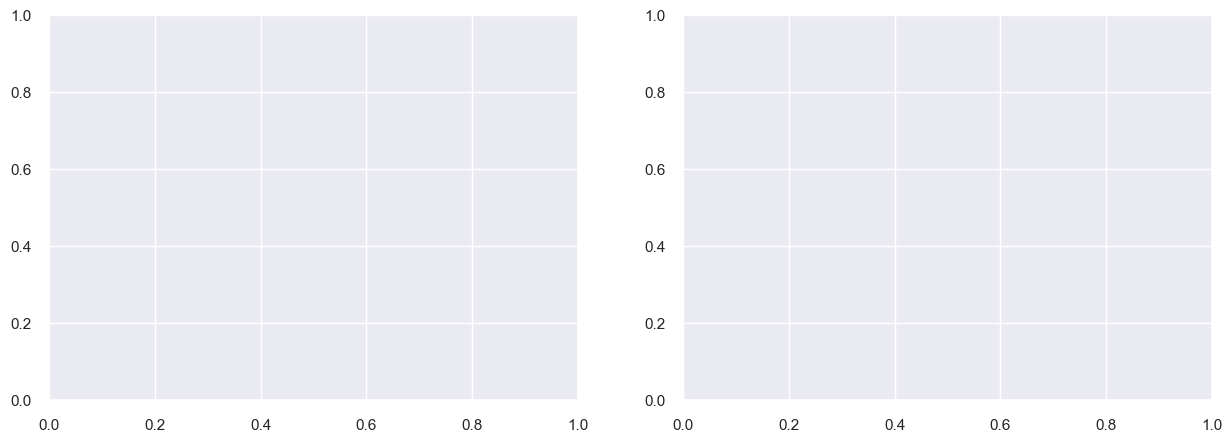

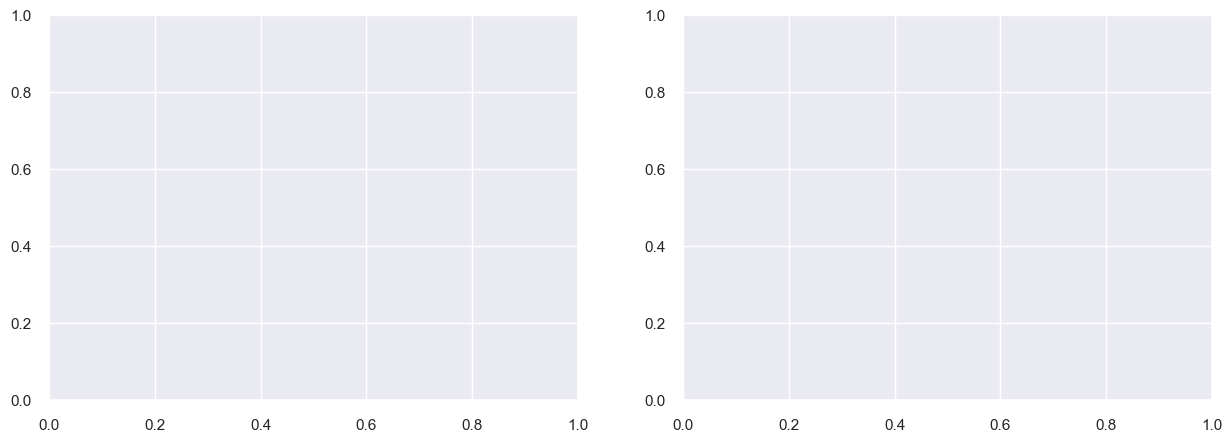

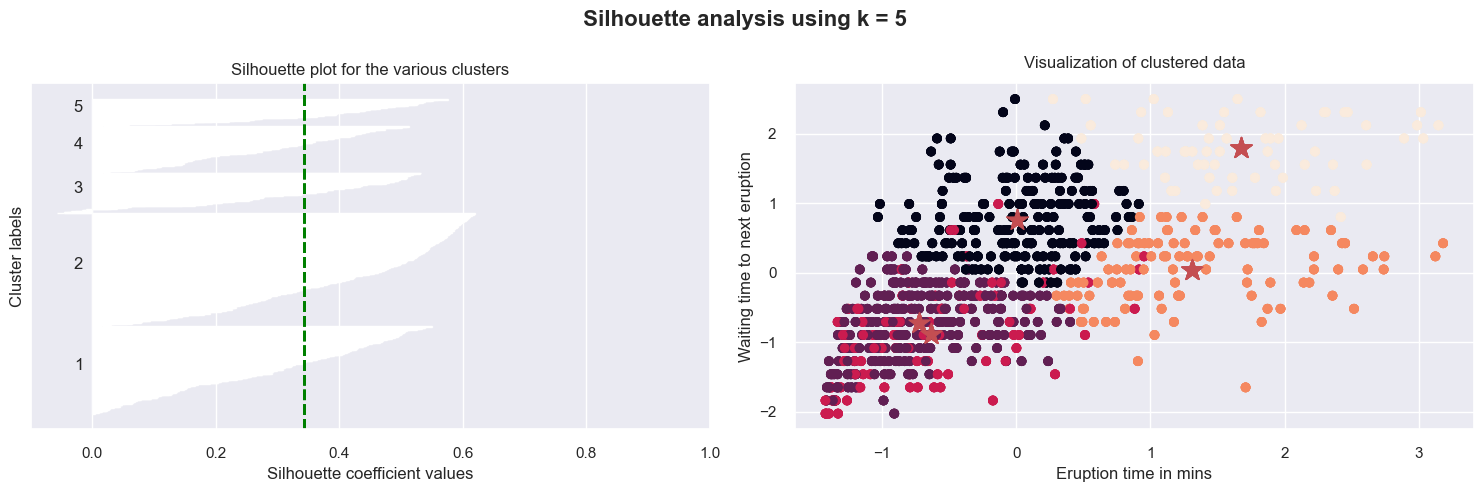

In [328]:

""" # load petal data
data = df2_scaled
# load into Dataframe 
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()
df2_scaled = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df2_scaled.head()
# plot scatter plot 
plt.scatter(df2_scaled['petal length (cm)'],df2_scaled['petal width (cm)']) """
# Now check silhouette coefficient
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df2_scaled)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(df2_scaled,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
   
    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1)
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)
        
    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters')
        
        
        # scatter plot of data colored with labels
        
    ax[1].scatter(df2_scaled['Amount'],
    df2_scaled['Frequency'] , c = y_predict)
    ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250)
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)
        
    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
    plt.savefig(f'Silhouette_analysis_{k}.jpg')

# k-means with some arbitrary k


In [329]:
# k = 3:
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(df2_scaled)
y_predicted = kmeans.fit_predict(df2_scaled)
y_predicted

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



array([2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2,

In [330]:
y_predicted.shape

(730,)

In [331]:
df2_scaled.shape

(730, 3)

In [332]:
df1.shape

(730, 4)

In [333]:
df2_scaled["Cluster"] = y_predicted
df2_scaled

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,2
1,-0.793645,0.612378,-0.691221,0
2,-0.355804,0.046987,0.582490,0
3,1.610234,1.177769,-0.500164,2
4,-0.895175,-1.083796,1.410402,1
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,1
726,2.234742,1.177769,-0.643457,2
727,1.829366,-0.706868,-0.770828,2
728,2.584484,0.046987,-0.744292,2


In [334]:
df1["ClusterID"] = y_predicted
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_5572\320560632.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2080,2
1,AA-10375,1056.390,15,1915,0
2,AA-10480,1790.512,12,2155,0
3,AA-10645,5086.935,18,1951,2
4,AB-10015,886.156,6,2311,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2896,1
786,VW-21775,6134.038,18,1924,2
789,YC-21895,5454.350,8,1900,2
790,YS-21880,6720.444,12,1905,2


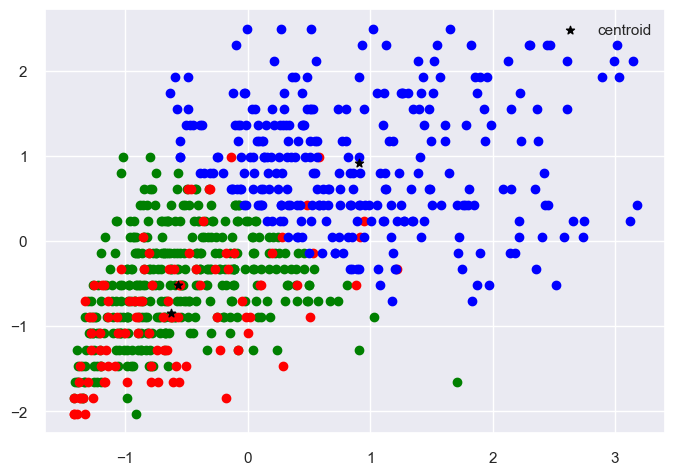

In [335]:
df2_scaled1 = df2_scaled[df2_scaled.Cluster == 0]
df2_scaled2 = df2_scaled[df2_scaled.Cluster == 1]
df2_scaled3 = df2_scaled[df2_scaled.Cluster == 2]
plt.scatter(df2_scaled1.Amount, df2_scaled1.Frequency, color = "green")
plt.scatter(df2_scaled2.Amount, df2_scaled2.Frequency, color = "red")
plt.scatter(df2_scaled3.Amount, df2_scaled3.Frequency, color = "blue")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black", marker = "*", label = "centroid")
plt.legend()

In [336]:
kmeans.cluster_centers_

array([[-0.56845649, -0.51183003, -0.30005151],
       [-0.62560495, -0.84495041,  2.07542245],
       [ 0.90784257,  0.91722639, -0.37333315]])

In [337]:
df1["ClusterID"] = y_predicted
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_5572\320560632.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2080,2
1,AA-10375,1056.390,15,1915,0
2,AA-10480,1790.512,12,2155,0
3,AA-10645,5086.935,18,1951,2
4,AB-10015,886.156,6,2311,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2896,1
786,VW-21775,6134.038,18,1924,2
789,YC-21895,5454.350,8,1900,2
790,YS-21880,6720.444,12,1905,2


In [338]:
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(0, 344), (1, 101), (2, 285)]

In [ ]:
label_list

array([2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,

Now I use 3 as the amount of cluster. I create plots to see the features of each cluster group

C:\Users\satom\AppData\Local\Temp\ipykernel_5572\2970428630.py:13: UserWarning: Legend does not support handles for AxesSubplot instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(handles = [ax, ax2, ax3], loc = "upper center")


<Figure size 1200x800 with 0 Axes>

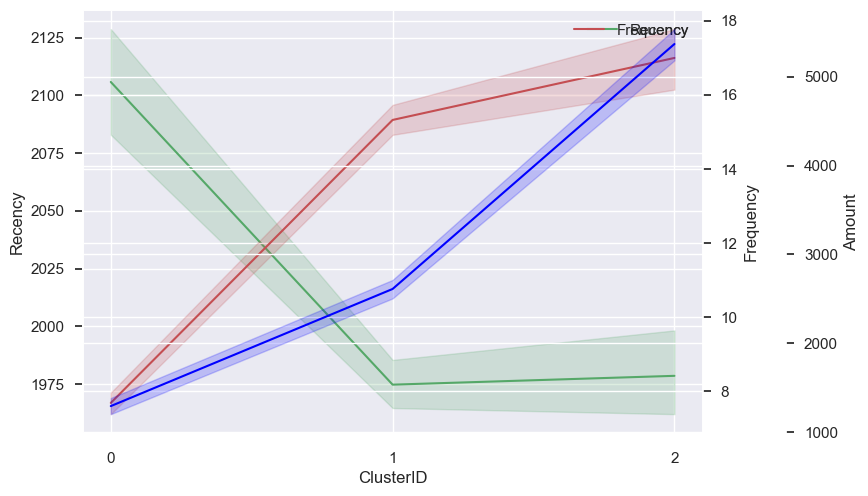

In [ ]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

ax = sns.lineplot(x = df1["ClusterID"], y = df1["Recency"], color = "g", label = "Recency")

ax2 = ax.twinx()
ax2 = sns.lineplot(x = df1["ClusterID"], y =df1["Frequency"], color= "r", label = "Frequency")

ax3 = ax.twinx()
ax3 = sns.lineplot(x = df1["ClusterID"], y = df1["Amount"], color = "blue", label = "Amount")
ax3.spines["right"].set_position(("outward", 60))
#sns.lineplot(x =df1["ClusterID"], y = df1["Frequency"], color = "b", label = "Frequency")
plt.legend(handles = [ax, ax2, ax3], loc = "upper center")
plt.xticks([0,1,2])
plt.show()

<Figure size 1200x800 with 0 Axes>

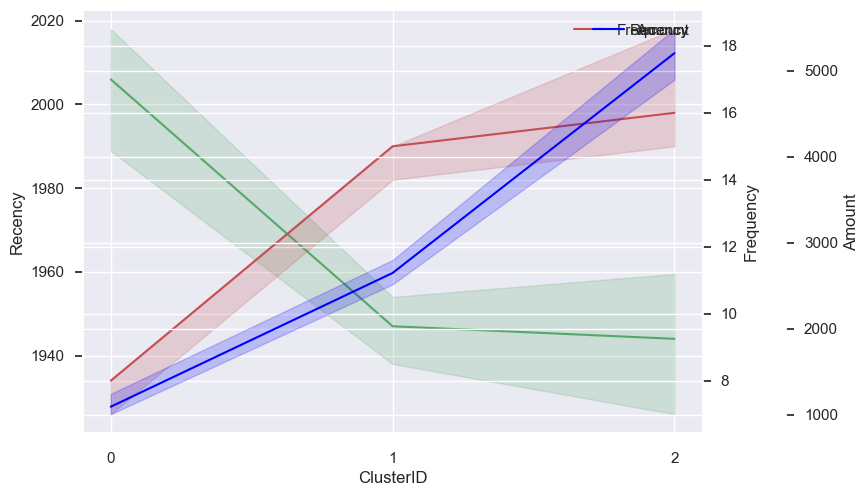

In [ ]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

ax = sns.lineplot(x = df1["ClusterID"], y = df1["Recency"], estimator = "median", color = "g", label = "Recency")

ax2 = ax.twinx()
ax2 = sns.lineplot(x = df1["ClusterID"], y =df1["Frequency"], estimator = "median", color= "r", label = "Frequency")

ax3 = ax.twinx()
ax3 = sns.lineplot(x = df1["ClusterID"], y = df1["Amount"], estimator = "median",color = "blue", label = "Amount")
ax3.spines["right"].set_position(("outward", 60))
#sns.lineplot(x =df1["ClusterID"], y = df1["Frequency"], color = "b", label = "Frequency")
plt.legend()
plt.xticks([0,1,2])
plt.show()

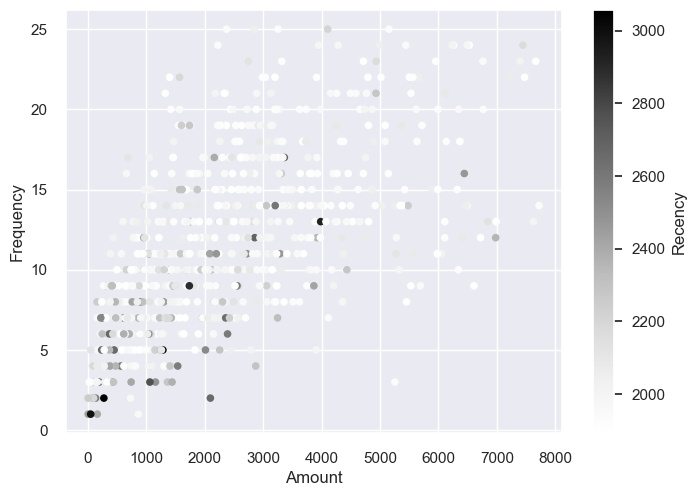

In [ ]:
ax = df1.plot.scatter(x='Amount',
                      y='Frequency',
                      c='Recency')

In [339]:
import plotly.express as px
fig = px.scatter_3d(df1, x='Amount', y='Frequency', z='Recency', color = "ClusterID")
fig.show()

In [342]:
df1

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2080,2
1,AA-10375,1056.390,15,1915,0
2,AA-10480,1790.512,12,2155,0
3,AA-10645,5086.935,18,1951,2
4,AB-10015,886.156,6,2311,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2896,1
786,VW-21775,6134.038,18,1924,2
789,YC-21895,5454.350,8,1900,2
790,YS-21880,6720.444,12,1905,2


In [ ]:
df_summary = round(df1.groupby(['ClusterID']).mean(),0).astype(int)
df_summary

C:\Users\satom\AppData\Local\Temp\ipykernel_5572\1401051517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summary = round(df1.groupby(['ClusterID']).mean(),0).astype(int)


,Amount,Frequency,Recency
ClusterID,,,
0,1294,8,2106
1,2612,15,1975
2,5367,17,1979


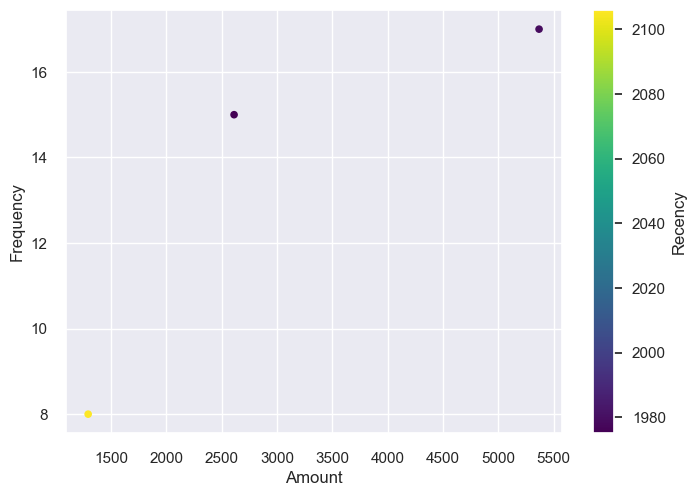

In [340]:
ax = df_summary.plot.scatter(x = "Amount",
                             y = "Frequency",
                             c = "Recency",
                             colormap ="viridis")
plt.show()

# Train the model

In [ ]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
787,WB-21850,6160.102,37,2017-12-10
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21


In [ ]:
#assign the label
df1["ClusterID"] = kmeans.labels_
df1.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2076,2
1,AA-10375,1056.390,15,1911,1
2,AA-10480,1790.512,12,2151,0
3,AA-10645,5086.935,18,1947,2
4,AB-10015,886.156,6,2307,3


In [ ]:
clusterer = KMeans(n_clusters=3, n_init="auto", random_state=0)

centers = clusterer.cluster_centers_
centers

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

<AxesSubplot: xlabel='ClusterID', ylabel='Amount'>

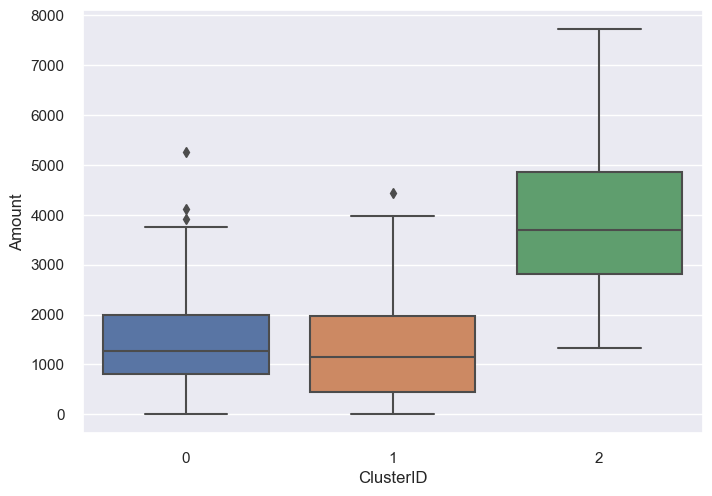

In [343]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='ClusterID', y='Amount', data=df1)

<AxesSubplot: xlabel='ClusterID', ylabel='Frequency'>

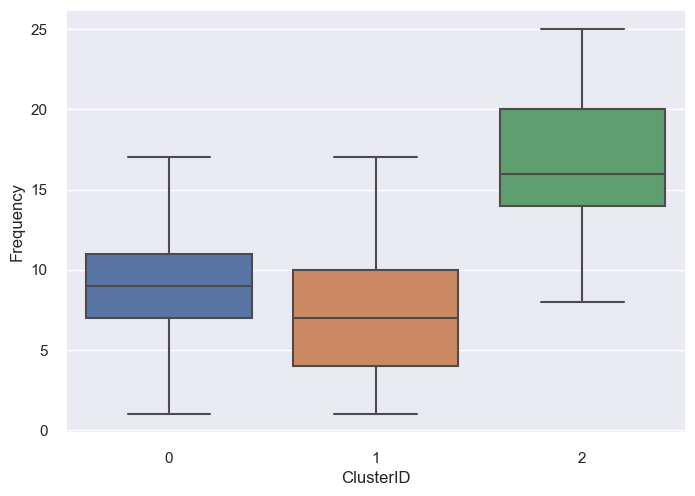

In [344]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='ClusterID', y='Frequency', data=df1)

<AxesSubplot: xlabel='ClusterID', ylabel='Recency'>

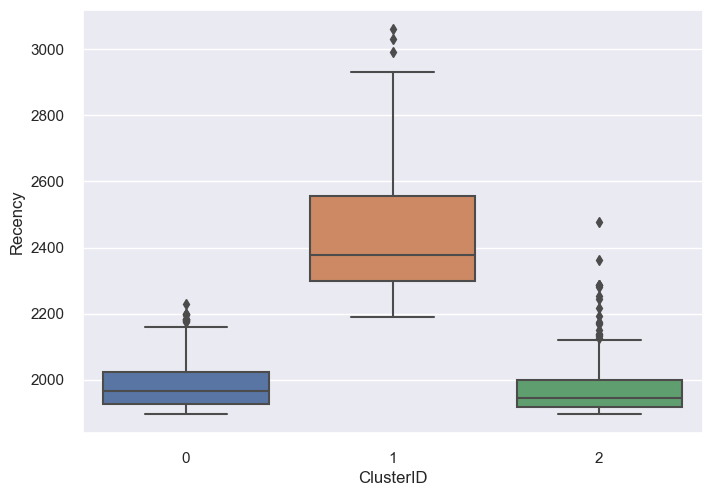

In [346]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='ClusterID', y='Recency', data=df1)

In [ ]:
group1 = df1[["CustomerID", ]]

Try to do silhouetten analysis and try to show the silhouette plot for the various clusters and the visualization of the clustered data'

In [ ]:
df1[["Amount", "Frequency", "Recency"]]

,Amount,Frequency,Recency
0,5563.560,11,2076
1,1056.390,15,1911
2,1790.512,12,2151
3,5086.935,18,1947
4,886.156,6,2307
...,...,...,...
785,1736.596,9,2892
786,6134.038,18,1920
789,5454.350,8,1896
790,6720.444,12,1901


Arbitrary K = 4

In [ ]:
# k = 4:
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(df2_scaled)
y_predicted = kmeans.fit_predict(df2_scaled)
y_predicted

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



array([2, 1, 0, 2, 3, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 0, 1, 3,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 3, 1, 0, 0, 0,
       2, 3, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 3, 0, 3, 3, 0, 1, 1, 0,
       2, 0, 1, 3, 1, 0, 1, 1, 2, 3, 1, 2, 1, 1, 0, 1, 1, 3, 0, 0, 1, 3,
       0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 3, 2, 3, 2, 2, 0, 3,
       0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 3, 3, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 3, 3, 0, 2, 3, 3, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 3, 0, 1, 0, 1, 1, 3, 2, 2, 1, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 1, 3, 0, 2, 1, 1, 1,
       1, 2, 3, 3, 0, 0, 2, 0, 0, 1, 3, 0, 1, 0, 1,

In [ ]:
df1["ClusterID"] = y_predicted
df1

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2076,2
1,AA-10375,1056.390,15,1911,1
2,AA-10480,1790.512,12,2151,0
3,AA-10645,5086.935,18,1947,2
4,AB-10015,886.156,6,2307,3
...,...,...,...,...,...
785,VT-21700,1736.596,9,2892,3
786,VW-21775,6134.038,18,1920,2
789,YC-21895,5454.350,8,1896,2
790,YS-21880,6720.444,12,1901,2


In [ ]:
df2_scaled["ClusterID"] = y_predicted
df2_scaled
#df2_scaled.drop(["Cluster"], axis = 1, inplace= True)

,Amount,Frequency,Recency,ClusterID
0,1.894500,-0.141477,0.184455,2
1,-0.793645,0.612378,-0.691221,1
2,-0.355804,0.046987,0.582490,0
3,1.610234,1.177769,-0.500164,2
4,-0.895175,-1.083796,1.410402,3
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,3
726,2.234742,1.177769,-0.643457,2
727,1.829366,-0.706868,-0.770828,2
728,2.584484,0.046987,-0.744292,2


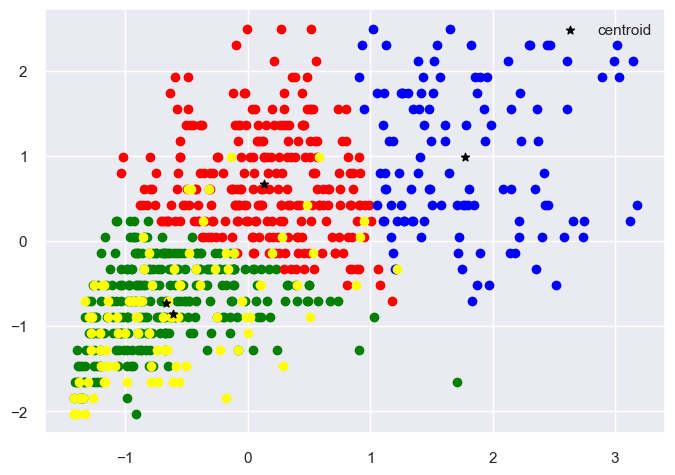

In [ ]:
df2_scaled1 = df2_scaled[df2_scaled.ClusterID == 0]
df2_scaled2 = df2_scaled[df2_scaled.ClusterID == 1]
df2_scaled3 = df2_scaled[df2_scaled.ClusterID == 2]
df2_scaled4 = df2_scaled[df2_scaled.ClusterID == 3]

plt.scatter(df2_scaled1.Amount, df2_scaled1.Frequency, color = "green")
plt.scatter(df2_scaled2.Amount, df2_scaled2.Frequency, color = "red")
plt.scatter(df2_scaled3.Amount, df2_scaled3.Frequency, color = "blue")
plt.scatter(df2_scaled4.Amount, df2_scaled4.Frequency, color = "yellow")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black", marker = "*", label = "centroid")
plt.legend()